In [26]:
import pandas as pd
import nltk
import numpy as np

In [27]:
df = pd.read_csv('./judge-1377884607_tweet_product_company.csv',encoding = "ISO-8859-1")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
 3   apple_or_google                                     9093 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 284.3+ KB


In [42]:
df.emotion_in_tweet_is_directed_at.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9088    False
9089     True
9090     True
9091     True
9092     True
Name: emotion_in_tweet_is_directed_at, Length: 9093, dtype: bool

In [43]:
apple = ['iPad', 'Apple', 'iPad or iPhone App', 'iPhone',
       'Other Apple product or service']

conditions = [df.emotion_in_tweet_is_directed_at == i for i in apple]

choices = [1 for i in range(len(conditions))]

conditions.append(df.emotion_in_tweet_is_directed_at.isnull())
choices.append(2)


df['apple_or_google'] = np.select(conditions,choices)
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,apple_or_google
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,0


In [44]:
df.apple_or_google.value_counts()

2    5802
1    2409
0     882
Name: apple_or_google, dtype: int64

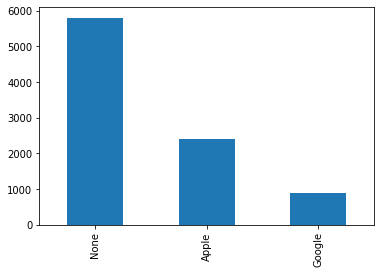

In [46]:
ax = df.apple_or_google.value_counts().plot(kind='bar')
ax.set_xticklabels(['None','Apple','Google']);

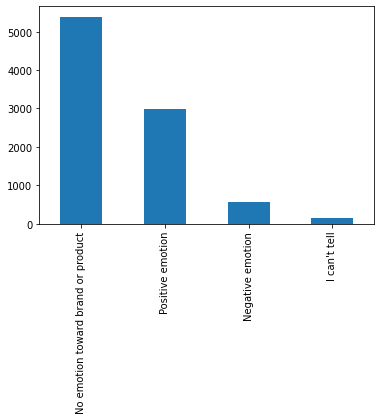

In [48]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts().plot(kind='bar')

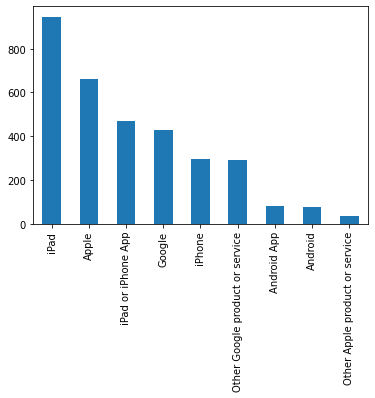

In [16]:
df.emotion_in_tweet_is_directed_at.value_counts().plot(kind='bar')

In [61]:
type(df.tweet_text[0])

str

In [178]:
import re
clean = df.tweet_text.str.lower()
clean.replace("[.,\"'?!:()\-$%<>~;#@]","", regex=True,inplace=True)
clean.replace("&amp","",regex=True,inplace=True)
clean.replace("\B{link}\B","",regex=True,inplace=True)
clean.replace('(rt)','',regex=True,inplace=True)
clean.replace('\s+',' ',regex=True,inplace=True)
df['clean'] = clean

In [179]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,apple_or_google,clean
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,1,wesley83 i have a 3g iphone after 3 hrs tweeti...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1,jessedee know about fludapp awesome ipad/iphon...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1,swonderlin can not wait for ipad 2 also they s...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,1,sxsw i hope this years festival isnt as crashy...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,0,sxtxstate great stuff on fri sxsw marissa maye...


In [180]:
from nltk.corpus import stopwords
stop_words = set(re.sub("'","", word) for word in stopwords.words('english'))

In [191]:
stop_words
df['tokens'] = df.clean.apply(lambda s:nltk.word_tokenize(str(s)))

In [193]:
df.tokens = df.tokens.apply(lambda tokens:[word for word in tokens if word not in stop_words])

In [194]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,apple_or_google,clean,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,1,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, 3g, iphone, 3, hrs, tweeting, rise_..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1,jessedee know about fludapp awesome ipad/iphon...,"[jessedee, know, fludapp, awesome, ipad/iphone..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,1,sxsw i hope this years festival isnt as crashy...,"[sxsw, hope, years, festival, crashy, years, i..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,0,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


In [216]:
words = pd.DataFrame(df.tokens.values.tolist()).values.reshape(9093*29,)
words = words[words!=None]

In [217]:
words

array(['wesley83', '3g', 'iphone', ..., '\x89ûïcheckin',
       'offers\x89û\x9d', 'sxsw'], dtype=object)

In [220]:
from nltk.probability import FreqDist

FreqDist(words).most_common(20)

[('sxsw', 9456),
 ('mention', 6904),
 ('ipad', 2423),
 ('google', 2341),
 ('apple', 2150),
 ('&', 1871),
 ('iphone', 1517),
 ('store', 1473),
 ('2', 1090),
 ('new', 1089),
 ('austin', 956),
 ('quot', 828),
 ('app', 813),
 ('launch', 653),
 ('social', 644),
 ('circles', 631),
 ('popup', 599),
 ('android', 568),
 ('today', 568),
 ('network', 466)]

In [215]:
type(None)

NoneType

In [166]:
test.a.apply(lambda x:x*10)

0    10
1    20
2    30
Name: a, dtype: int64